In [1]:
from datetime import datetime
from dateutil import parser
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
enron_df = pd.read_csv('datasets/explored/enron-emails-explored.csv')
mal_df = pd.read_csv('datasets/explored/malicious-emails-explored.csv')

# Top Charsets

In [3]:
def getPieChartCharset(series):
    used_charset = series.groupby('charset', dropna=False).charset.count()
    used_charset = used_charset.sort_values(ascending=False)
    top_x = used_charset[:5]
    others = pd.Series(used_charset[5:].sum(), index=['others'])
    top_charsets = pd.concat([top_x, others])
    top_charsets.rename = "Top Charsets"
    top_charsets.plot(kind='pie', figsize=(7,7), fontsize=20, ylabel='Top Charsets',subplots=True)

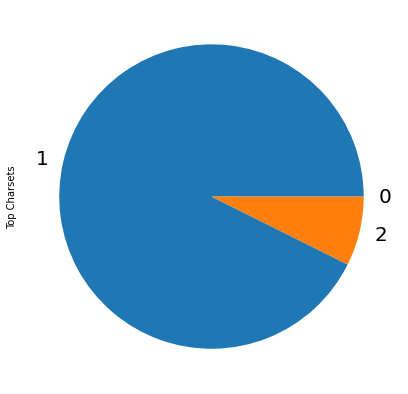

In [4]:
getPieChartCharset(enron_df)

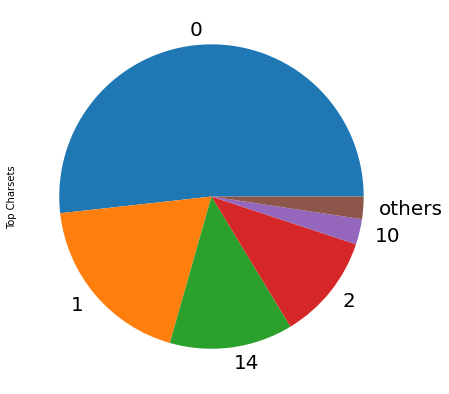

In [5]:
getPieChartCharset(mal_df)

# Top Domain used to send email

In [6]:
def getPieChartDomain(series):
    top_domain = series.groupby('from_domain', dropna=False).from_domain.count()
    top_domain = top_domain.sort_values(ascending=False)
    top_x = top_domain[:5]
    others = pd.Series(top_domain[5:].sum(), index=['others'])
    top_domain = pd.concat([top_x, others])
    top_domain.rename = "Top Charsets"
    top_domain.plot(kind='pie', figsize=(7,7), fontsize=16, ylabel='Top 5 Email Domain',subplots=True, legend=True)

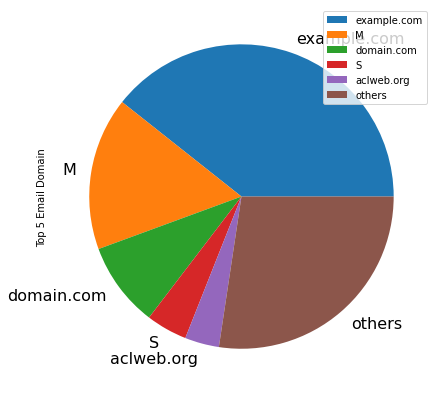

In [7]:
getPieChartDomain(mal_df)

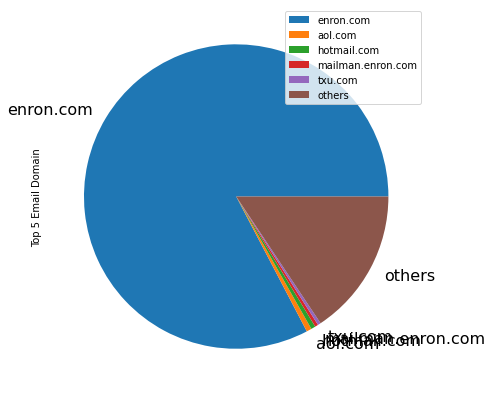

In [8]:
getPieChartDomain(enron_df)

## Range of periods when the email is send

In [9]:
date = mal_df.parsed_date.apply(lambda date: parser.parse(date).date())
date_emails = date.groupby(date, dropna=False).count()

In [30]:
date.groupby(date, dropna=False).count()


parsed_date
1979-12-31    522
1986-04-26      1
1986-05-01      1
1997-01-01      1
1997-03-03      3
             ... 
2020-12-29      1
2024-05-26      1
2043-12-28      1
2044-01-02      1
2044-01-04      2
Name: parsed_date, Length: 1343, dtype: int64

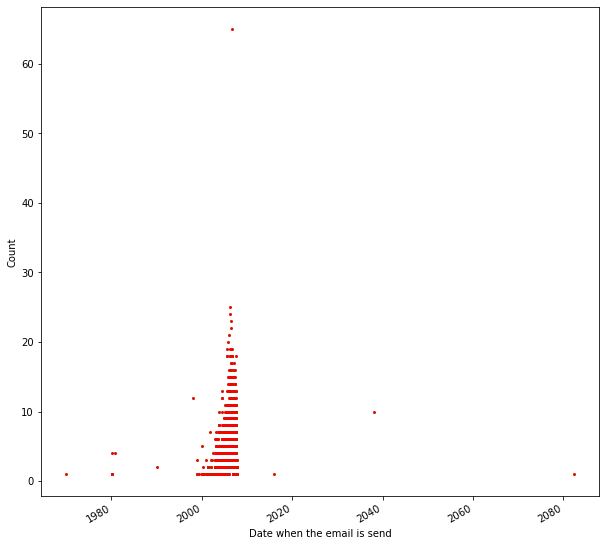

In [10]:
x = date_emails.index
y = date_emails.values

fig, ax = plt.subplots()
ax.plot_date(x, y, markerfacecolor='green', markeredgecolor='red', ms=2)
fig.autofmt_xdate()
fig.set_size_inches(10,10)
plt.ylabel('Count')
plt.xlabel('Date when the email is send')
plt.show()

In [11]:
date = enron_df.parsed_date.apply(lambda date: parser.parse(date).date())
date_emails = date.groupby(date, dropna=False).count()

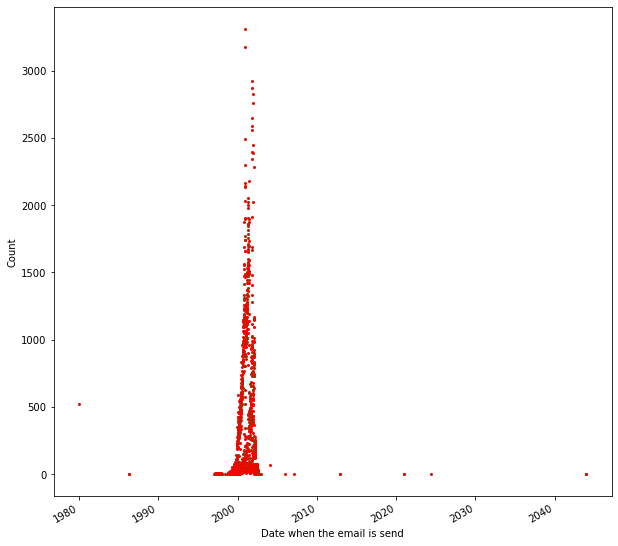

In [12]:
x = date_emails.index
y = date_emails.values

fig, ax = plt.subplots()
ax.plot_date(x, y, markerfacecolor='green', markeredgecolor='red', ms=2)
fig.autofmt_xdate()
fig.set_size_inches(10,10)
plt.ylabel('Count')
plt.xlabel('Date when the email is send')
plt.show()

## Lenght of email subject

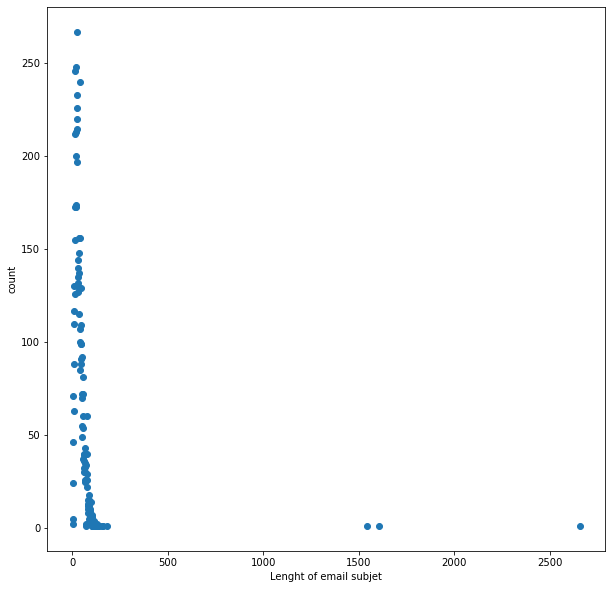

In [13]:
subject = mal_df.subject.apply(lambda s: len(f'{s}'))
subject = subject.groupby(subject, dropna=False).count()
y = subject.values
x = subject.index

fig, ax = plt.subplots()
ax.scatter(x, y)
fig.set_size_inches(10,10)
plt.ylabel('count')
plt.xlabel('Lenght of email subjet')
plt.show()

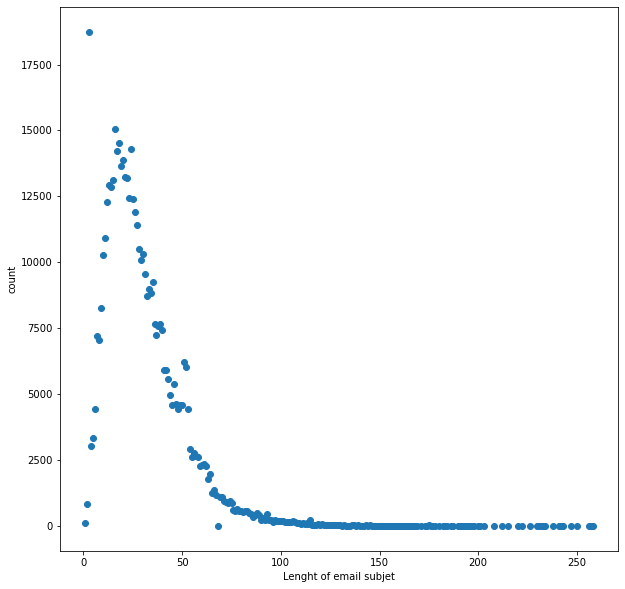

In [14]:
subject = enron_df.subject.apply(lambda s: len(f'{s}'))
subject = subject.groupby(subject, dropna=False).count()
y = subject.values
x = subject.index

fig, ax = plt.subplots()
ax.scatter(x, y)
fig.set_size_inches(10,10)
plt.ylabel('count')
plt.xlabel('Lenght of email subjet')
plt.show()

## No of URLs found in message body

In [45]:
mal_df.URLs_in_message


0        0
1        0
2        0
3        0
4        0
        ..
8124     1
8125    15
8126     2
8127     1
8128    64
Name: URLs_in_message, Length: 8129, dtype: int64

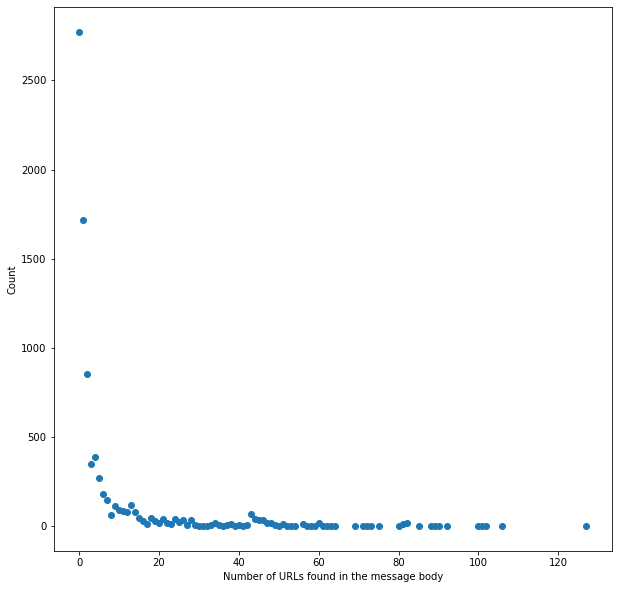

In [69]:
temp = mal_df.URLs_in_message.groupby(mal_df.URLs_in_message.values).count()
y = temp
x = temp.index 

fig, ax = plt.subplots()
ax.scatter(x=x, y=y)
fig.set_size_inches(10,10)
plt.ylabel('Count')
plt.xlabel('Number of URLs found in the message body')
plt.show()

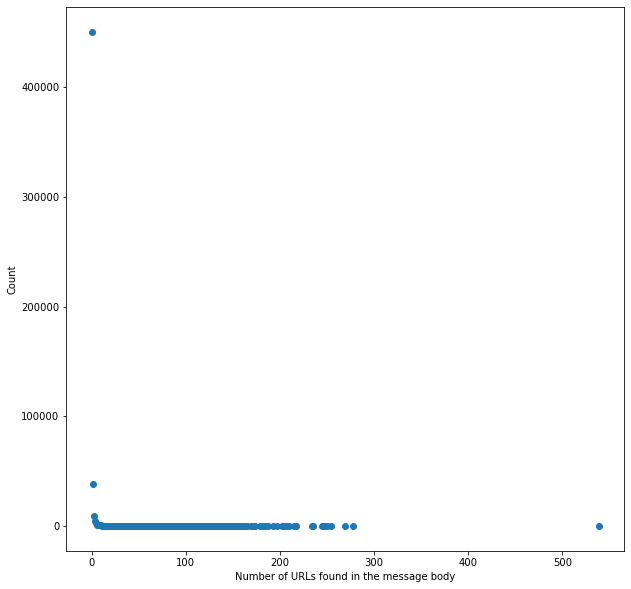

In [81]:
temp = enron_df.URLs_in_message.groupby(enron_df.URLs_in_message.values).count()
x = temp.index 
y = temp

fig, ax = plt.subplots()
ax.scatter(x, y)
fig.set_size_inches(10,10)
plt.ylabel('Count')
plt.xlabel('Number of URLs found in the message body')
plt.show()

In [100]:
features = [
    'content_type',
    'content_transfer_encoding',
    'charset',
    'html',
    'javascript',
    'css',
    'html_form',
    'html_iframe',
    'URLs_in_message',
    'subject_len',
    'subject_entropy',
    'body_entropy',
    'attachement',
    'malicious'
]


In [91]:
import random


part_1 = enron_df.sample(11871, ignore_index=True, random_state=1)
part_2 = mal_df
rand = round(random.random())

training_set = (pd.concat([part_1, part_2], ignore_index=True)).sample(
    frac=1, ignore_index=True, random_state=rand)

# Correlation Matrix

In [111]:
features = [
    'content_type',
    'content_transfer_encoding',
    'charset',
    'html',
    'javascript',
    'css',
    'html_form',
    'html_iframe',
    'URLs_in_message',
    'subject_len',
    'subject_entropy',
    'body_entropy',
    'attachement',
    'malicious'
]

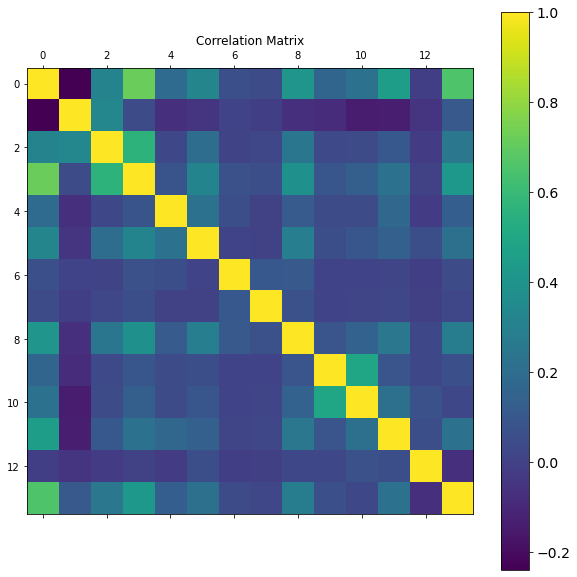

In [113]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(10, 10))
plt.matshow(training_set[features].corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix')
plt.show()

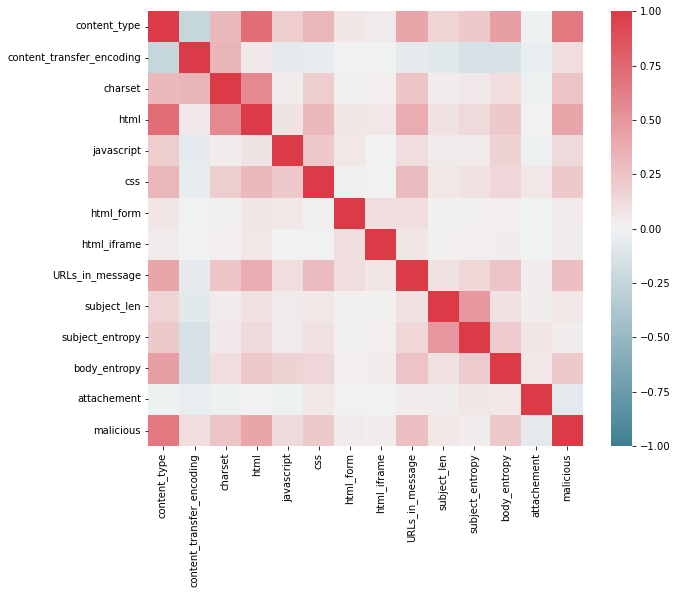

In [112]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = training_set[features].corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
plt.show()

# pairplot

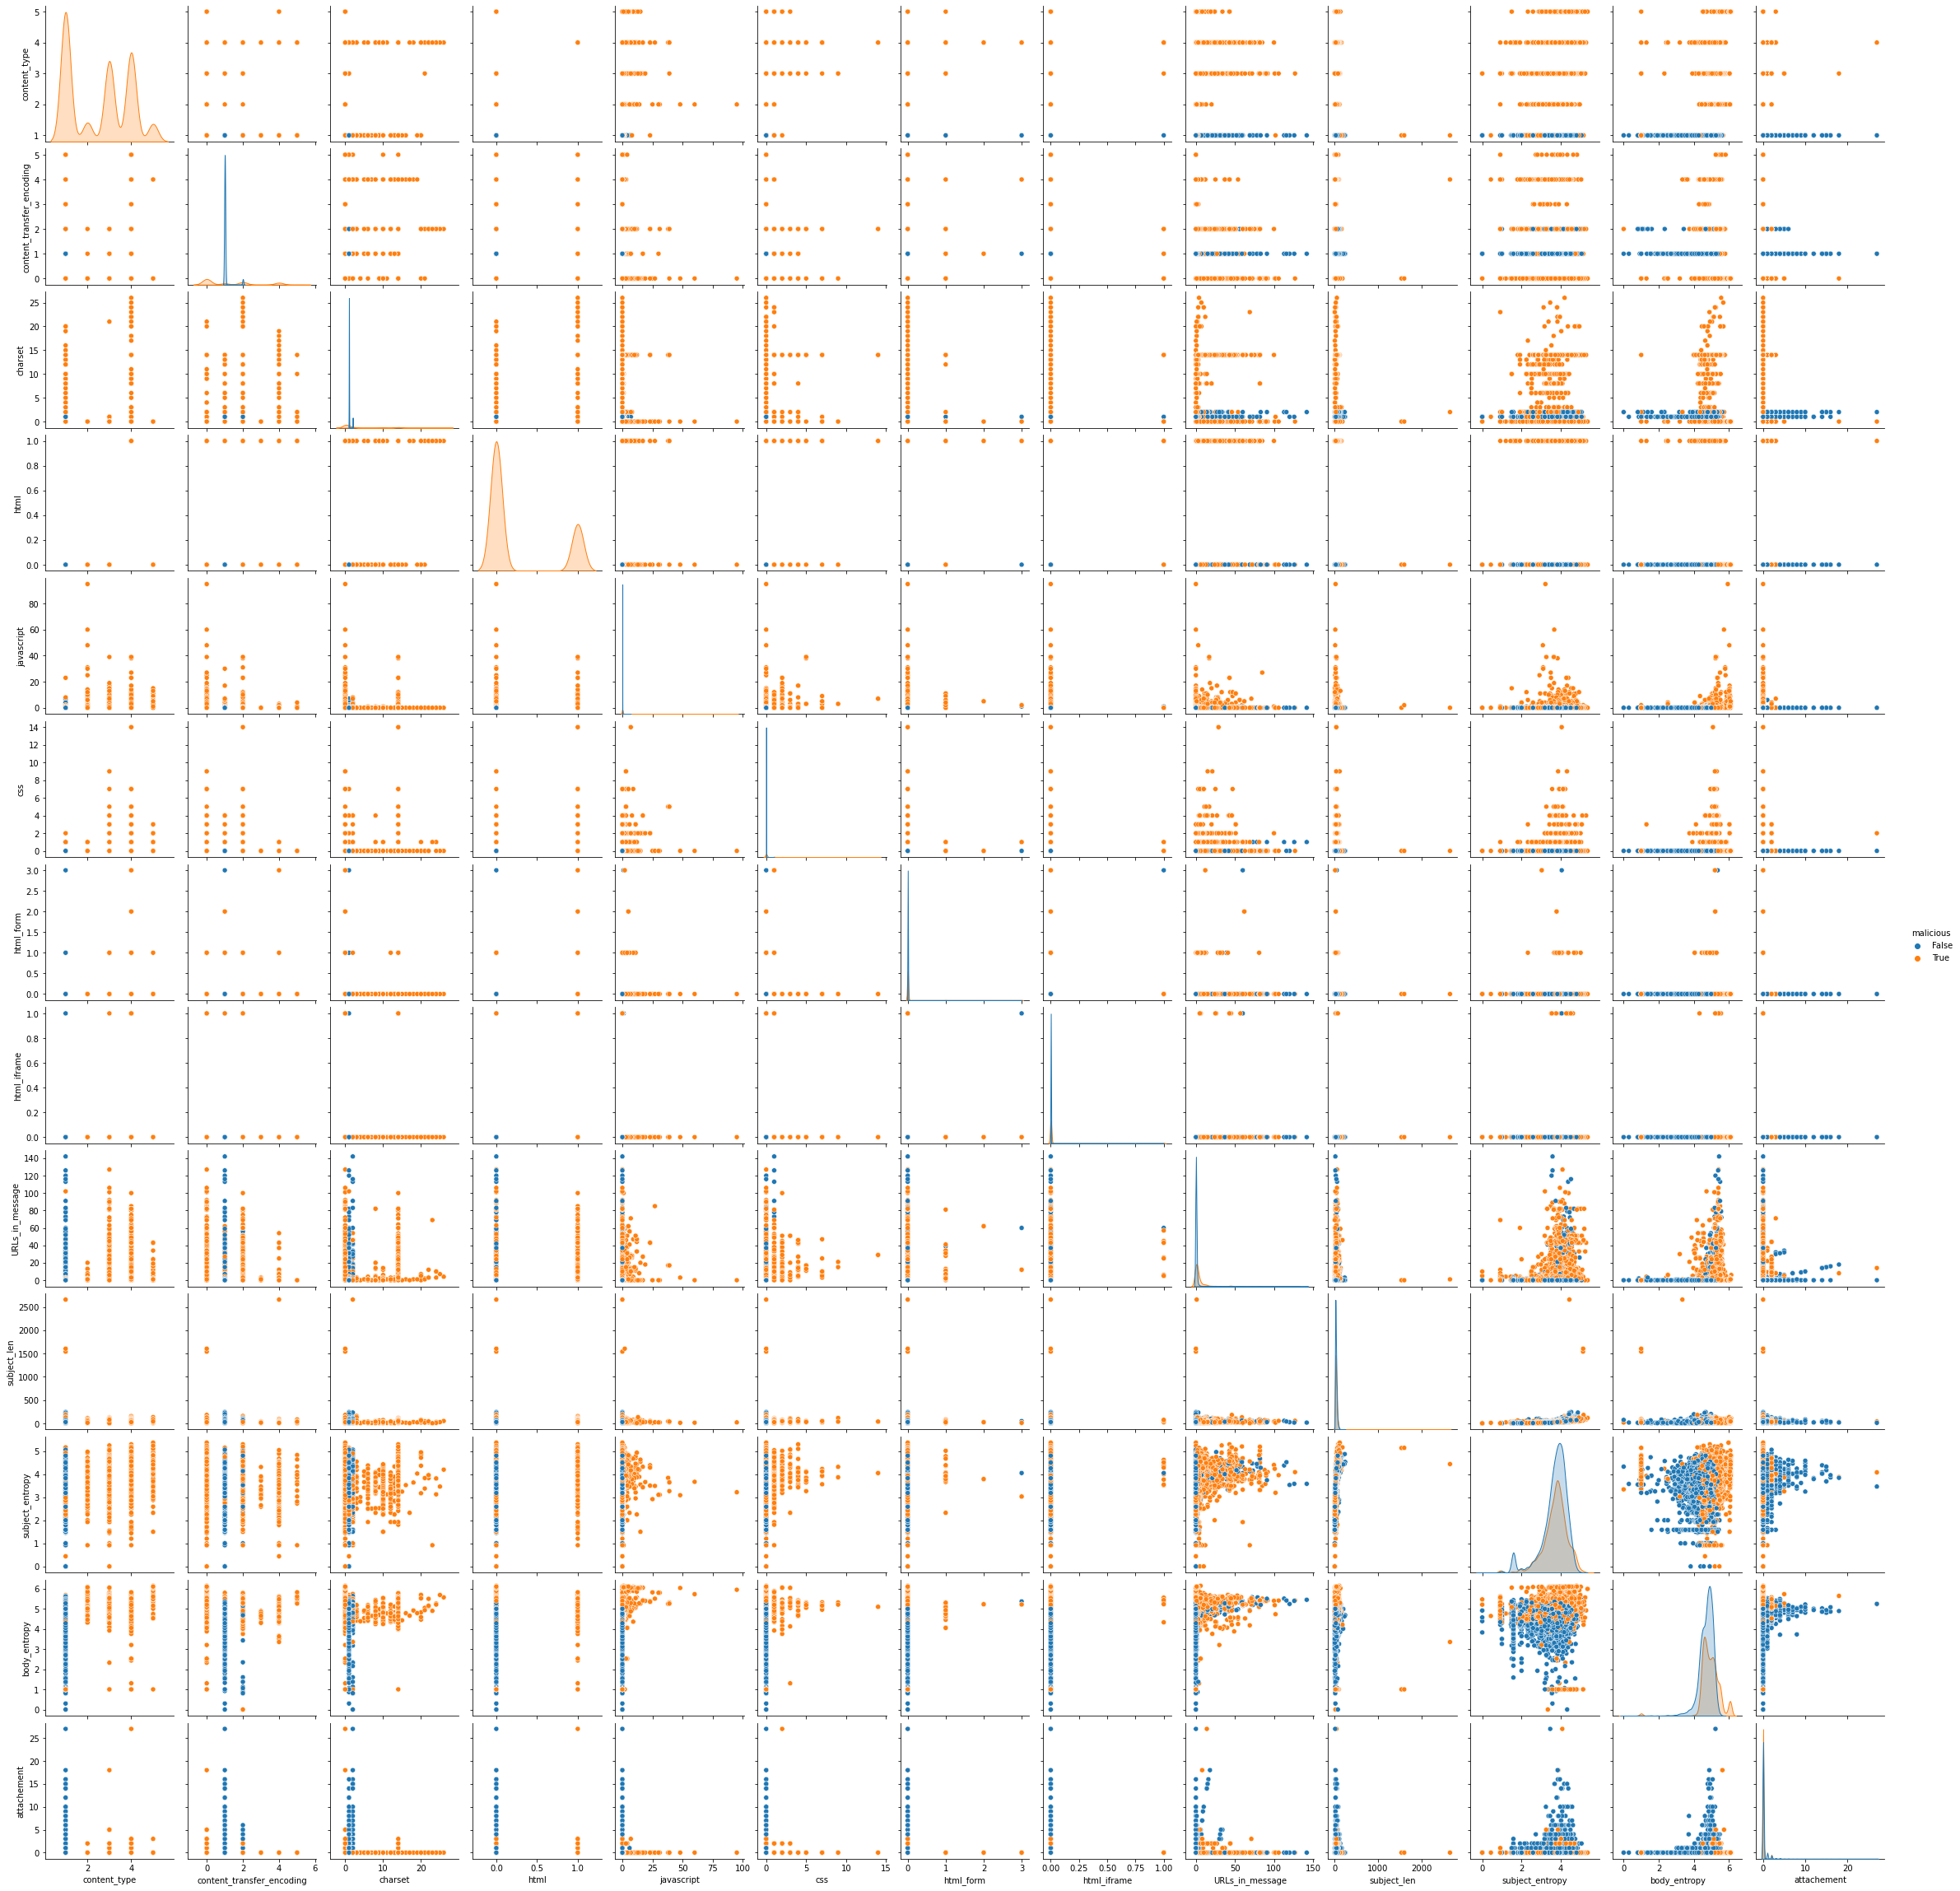

In [108]:
sns.pairplot(training_set[features], hue='malicious')